In [1]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import re
import xml.etree.ElementTree as ET

import heartpy as hp

In [2]:
# Maps
video_emotion_map = {
    '69.avi': 'disgust',
    '55.avi': 'anger',
    '58.avi': 'amusement',
    'earworm_f.avi': 'disgust',
    '53.avi': 'amusement',
    '80.avi': 'joy',
    '52.avi': 'amusement',
    '79.avi': 'joy',
    '73.avi': 'fear',
    '90.avi': 'joy',
    '107.avi': 'fear',
    '146.avi': 'sadness',
    '30.avi': 'fear',
    '138.avi': 'sadness',
    'newyork_f.avi': 'neutral',
    '111.avi': 'sadness',
    'detroit_f.avi': 'neutral',
    'cats_f.avi': 'joy',
    'dallas_f.avi': 'neutral',
    'funny_f.avi': 'joy'
}

emotion_number_map= {
    'neutral': 0,
    'anger': 1,
    'disgust': 2,
    'fear': 3,
    'joy': 4,
    'sadness': 5,
    'suprise': 6,
    'scream': 7,
    'bored': 8,
    'sleepy': 9,
    'unknown': 10,
    'amusement': 11,
    'anxiety': 12
}

In [3]:
# pandas dataframe storage
# Read file names
dataset_root = '/Users/Russel/myProjects/emotion-recognition/code/datasets/mahnob_hci/Sessions/'
dataset_path = Path(dataset_root)
dataset_dirs = sorted(os.listdir(dataset_root), key=int)
dataset_dirs = [dataset_path / dataset_dir for dataset_dir in dataset_dirs]

dataset = pd.DataFrame(columns=['ECG1', 'ECG2', 'ECG3', 'status', 'label', 'feltEmo', 'feltVlnc', 'feltArsl', 'feltCtrl', 'feltPred', 'subject', 'trial', 'bdf_file_path', 'session_file_path'])

bdf_file_pattern = re.compile('Part_(?P<subject>\d+)_S_Trial(?P<trial>\d+)_emotion')

for i, dataset_dir in enumerate(dataset_dirs):
    bdf_file = list(dataset_dir.glob("*.bdf"))
    if bdf_file:
        bdf_file = bdf_file[0]
        print('Adding', bdf_file.stem)
        session_file = list(dataset_dir.glob("*.xml"))[0]
        
        # Read signal
        f = pyedflib.EdfReader(str(bdf_file))
        sigbufs = np.zeros((4, f.getNSamples()[0]))
        sigbufs[0, :] = f.readSignal(32)
        sigbufs[1, :] = f.readSignal(33)
        sigbufs[2, :] = f.readSignal(34)
        sigbufs[3, :] = f.readSignal(46)
            
        # Read metadata
        m = bdf_file_pattern.match(bdf_file.stem)
        subject = m.groups()[0]
        trial = m.groups()[1]
        
        # Read labels
        root = ET.parse(session_file).getroot()
        
        # Append to dataset dataframe
        dataset.loc[i, 'ECG1'] = sigbufs[0]
        dataset.loc[i, 'ECG2'] = sigbufs[1]
        dataset.loc[i, 'ECG3'] = sigbufs[2]
        dataset.loc[i, 'status'] =  sigbufs[3]
        dataset.loc[i, 'label'] =  int(emotion_number_map[video_emotion_map[root.attrib['mediaFile']]])
        dataset.loc[i, 'feltEmo'] =  int(root.attrib['feltEmo'])
        dataset.loc[i, 'feltArsl'] =  int(root.attrib['feltArsl'])
        dataset.loc[i, 'feltVlnc'] =  int(root.attrib['feltVlnc'])
        dataset.loc[i, 'feltCtrl'] =  int(root.attrib['feltCtrl'])
        dataset.loc[i, 'feltPred'] =  int(root.attrib['feltPred'])
        dataset.loc[i, 'subject'] = subject
        dataset.loc[i, 'trial'] = trial
        dataset.loc[i, 'bdf_file_path'] = bdf_file.as_posix()
        dataset.loc[i, 'session_file_path'] = session_file.as_posix()

Adding Part_1_S_Trial1_emotion
Adding Part_1_S_Trial2_emotion
Adding Part_1_S_Trial3_emotion
Adding Part_1_S_Trial4_emotion
Adding Part_1_S_Trial5_emotion
Adding Part_1_S_Trial6_emotion
Adding Part_1_S_Trial7_emotion
Adding Part_1_S_Trial8_emotion
Adding Part_1_S_Trial9_emotion
Adding Part_1_S_Trial10_emotion
Adding Part_1_S_Trial11_emotion
Adding Part_1_S_Trial12_emotion
Adding Part_1_S_Trial13_emotion
Adding Part_1_S_Trial14_emotion
Adding Part_1_S_Trial15_emotion
Adding Part_1_S_Trial16_emotion
Adding Part_1_S_Trial17_emotion
Adding Part_1_S_Trial18_emotion
Adding Part_1_S_Trial19_emotion
Adding Part_1_S_Trial20_emotion
Adding Part_2_S_Trial1_emotion
Adding Part_2_S_Trial2_emotion
Adding Part_2_S_Trial3_emotion
Adding Part_2_S_Trial4_emotion
Adding Part_2_S_Trial5_emotion
Adding Part_2_S_Trial6_emotion
Adding Part_2_S_Trial7_emotion
Adding Part_2_S_Trial8_emotion
Adding Part_2_S_Trial9_emotion
Adding Part_2_S_Trial10_emotion
Adding Part_2_S_Trial11_emotion
Adding Part_2_S_Trial12_em

Adding Part_16_S_Trial9_emotion
Adding Part_16_S_Trial10_emotion
Adding Part_16_S_Trial11_emotion
Adding Part_16_S_Trial12_emotion
Adding Part_16_S_Trial13_emotion
Adding Part_16_S_Trial14_emotion
Adding Part_16_S_Trial15_emotion
Adding Part_16_S_Trial16_emotion
Adding Part_17_S_Trial1_emotion
Adding Part_17_S_Trial2_emotion
Adding Part_17_S_Trial3_emotion
Adding Part_17_S_Trial4_emotion
Adding Part_17_S_Trial5_emotion
Adding Part_17_S_Trial6_emotion
Adding Part_17_S_Trial7_emotion
Adding Part_17_S_Trial8_emotion
Adding Part_17_S_Trial9_emotion
Adding Part_17_S_Trial10_emotion
Adding Part_17_S_Trial11_emotion
Adding Part_17_S_Trial12_emotion
Adding Part_17_S_Trial13_emotion
Adding Part_17_S_Trial14_emotion
Adding Part_17_S_Trial15_emotion
Adding Part_17_S_Trial16_emotion
Adding Part_17_S_Trial17_emotion
Adding Part_17_S_Trial18_emotion
Adding Part_17_S_Trial19_emotion
Adding Part_17_S_Trial20_emotion
Adding Part_18_S_Trial1_emotion
Adding Part_18_S_Trial2_emotion
Adding Part_18_S_Trial

Adding Part_30_S_Trial5_emotion
Adding Part_30_S_Trial6_emotion
Adding Part_30_S_Trial7_emotion
Adding Part_30_S_Trial8_emotion
Adding Part_30_S_Trial9_emotion
Adding Part_30_S_Trial10_emotion
Adding Part_30_S_Trial11_emotion
Adding Part_30_S_Trial12_emotion
Adding Part_30_S_Trial13_emotion
Adding Part_30_S_Trial14_emotion
Adding Part_30_S_Trial15_emotion
Adding Part_30_S_Trial16_emotion
Adding Part_30_S_Trial17_emotion
Adding Part_30_S_Trial18_emotion
Adding Part_30_S_Trial19_emotion
Adding Part_30_S_Trial20_emotion


((30000,), 1.0, 0.8869360448238597, numpy.ndarray)

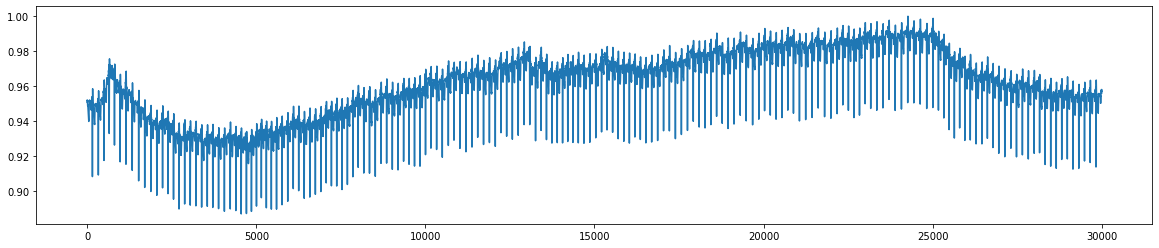

In [4]:
data = dataset.loc[200]['ECG3'][:30000]
data = abs(data)/max(abs(data))
plt.figure(figsize=(20,4))
plt.plot(data)
data.shape, max(data), min(data), type(data)

In [5]:
sample_rate = 1024
filtered = hp.remove_baseline_wander(data, sample_rate)
plt.figure(figsize=(20, 4))
plt.plot(data[20000:30000])
plt.plot(filtered[20000:30000])

AttributeError: module 'HeartPy' has no attribute 'remove_baseline_wander'

In [ ]:
sample_rate = 256
wd, m = hp.process(data, sample_rate)
plt.figure(figsize=(20, 4))
hp.plotter(wd, m)

In [ ]:
data = hp.get_data('../datasets/ecg_sample.csv')
data /= max(data)
data.shape, max(data), min(data), type(data)

using biosppy

<Figure size 2880x2880 with 0 Axes>

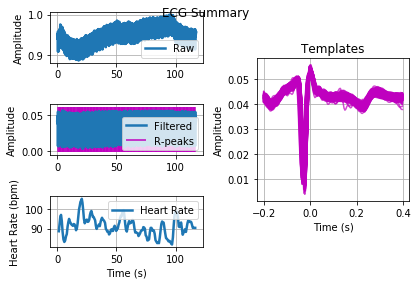

In [9]:
from biosppy.signals import ecg

# process it and plot
plt.figure(figsize=(40, 40))
out = ecg.ecg(signal=data, sampling_rate=256.0, show=True)

In [10]:
ecg.correct_rpeaks(signal=data, rpeaks=out[3], sampling_rate=256.0)

ReturnTuple(rpeaks=array([], dtype=int64))

In [14]:
out[1].shape

(30000,)

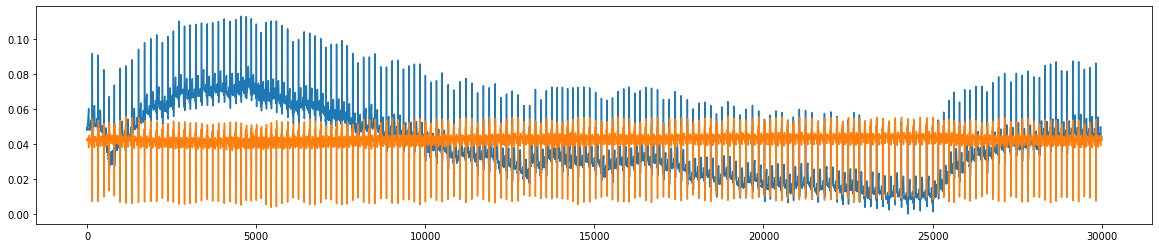

In [20]:
plt.figure(figsize=(20, 4))
plt.plot(abs(1.0-data))
plt.plot(out[1])

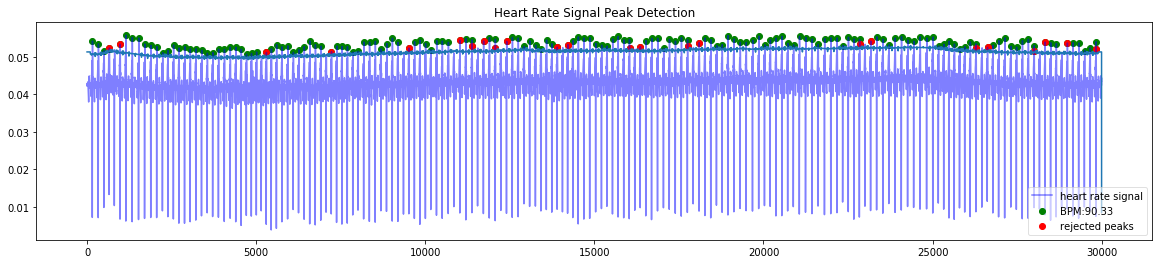

In [17]:
wd, m = hp.process(out[1], 256.0)
plt.figure(figsize=(20, 4))
hp.plotter(wd, m)

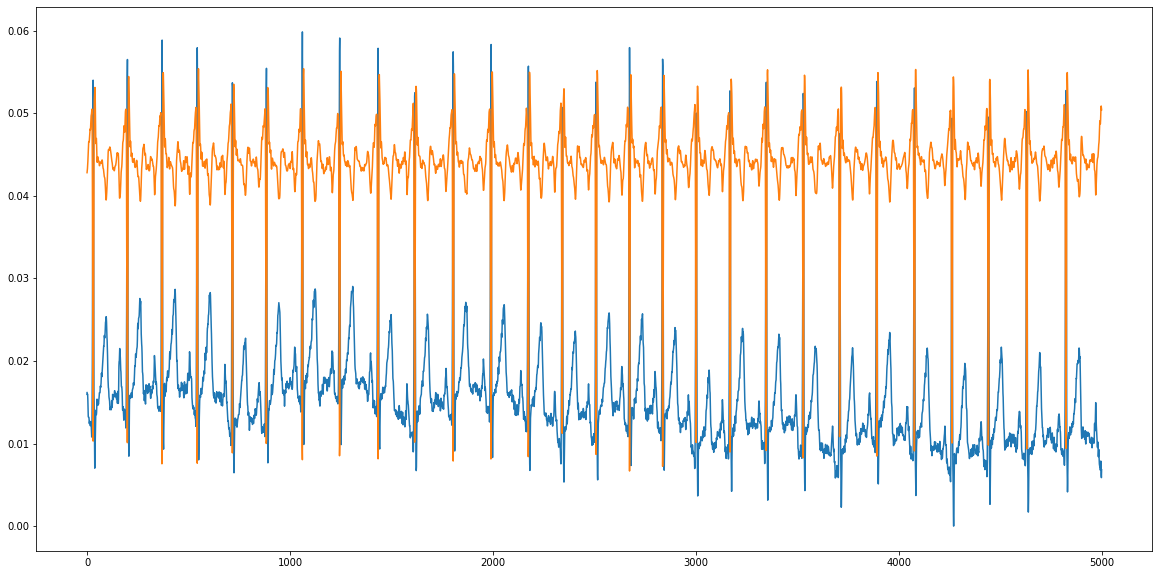

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(1.0 - data[20000:25000])
plt.plot(out[1][20000:25000])